In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator


In [2]:
# %pip install kneed


In [3]:
filename = "housing.csv"
data=pd.read_csv(filename)
# print(data) 
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# data = data.iloc[:,  :-1]
# data=data.loc[:,['longitude','latitude','median_income','median_house_value','population']]
data=data.loc[:,['median_income','median_house_value']]
# plt.scatter(data.latitude,data.longitude)
data

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [5]:
data=np.array(data)
data

array([[8.3252e+00, 4.5260e+05],
       [8.3014e+00, 3.5850e+05],
       [7.2574e+00, 3.5210e+05],
       ...,
       [1.7000e+00, 9.2300e+04],
       [1.8672e+00, 8.4700e+04],
       [2.3886e+00, 8.9400e+04]])

The optimal number of clusters is: 5


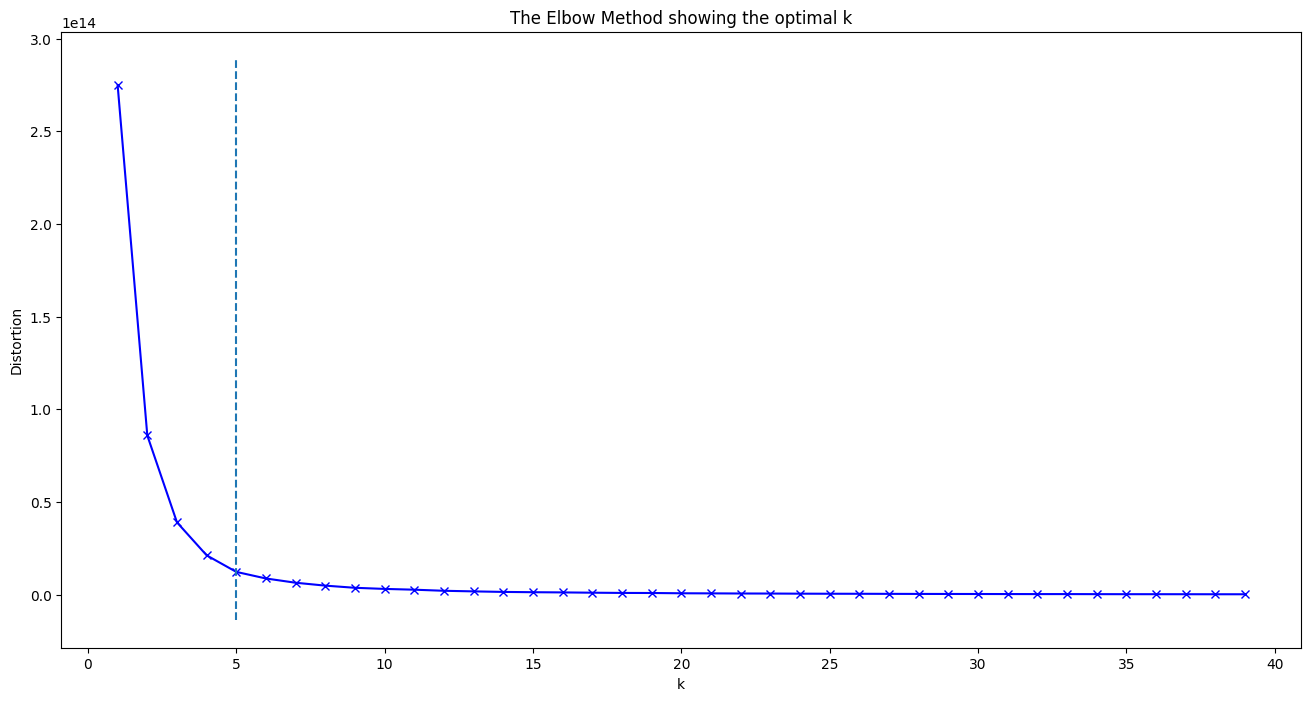

In [6]:

# dec. an empty list to store the within-cluster sum of squares (WCSS)
wcss = []
K = range(1,40)  # Change this range according to your needs


for k in K:
    # Create a KMeans model with 'k' clusters
    kmeanModel = KMeans(n_clusters=k)

    kmeanModel.fit(data)
    
    wcss.append(kmeanModel.inertia_)

# Use the KneeLocator function to find the 'elbow point' in the WCSS curve
kn = KneeLocator(K, wcss, curve='convex', direction='decreasing')

# Print the optimal number of clusters
print('The optimal number of clusters is:', kn.knee)

# Store the optimal number of clusters for later use
optimal_k = kn.knee


plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [7]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define the range of 'k' values to test
K = range(1,40)  # Change this range according to your needs

# Loop over the 'k' values
for k in K:
    # Create a KMeans model with 'k' clusters
    kmeanModel = KMeans(n_clusters=k)
    
    # Fit the model to the data
    kmeanModel.fit(data)
    
    # Append the model's WCSS to the list
    wcss.append(kmeanModel.inertia_)

# Use the KneeLocator function to find the 'elbow point' in the WCSS curve
kn = KneeLocator(K, wcss, curve='convex', direction='decreasing')

# Print the optimal number of clusters
print('The optimal number of clusters is:', kn.knee)

# Store the optimal number of clusters for later use
optimal_k = kn.knee

The optimal number of clusters is: 5


In [8]:

m=2
U=np.random.rand(data.shape[0],optimal_k)
# U=U/U.sum(axis=1).reshape(-1,1)
U/=U.sum(axis=1)[:,np.newaxis]

In [9]:
c=np.sum((U[:,0]**m)[:,np.newaxis]*data,axis=0)/np.sum(U[:,0]**m)

In [10]:
def calc_centroids(data, U, m):    
    centroids = np.zeros((optimal_k, data.shape[1]))
    for i in range(optimal_k):
        centroids[i:] = np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0) / np.sum(U[:,i]**m)
    return centroids

centroids = calc_centroids(data, U, m)


In [11]:
def calculate_membership (data, Centroids, optimal_k , m):
    U_new=np.zeros((data.shape[0],optimal_k))
    for i in range (optimal_k):
        # finds the Euclidean distance from each data point to the centroid of the current cluster
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)
    # upates the membership values based on the distance
    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [12]:
U_new=np.zeros((data.shape[0],optimal_k))
U_new=calculate_membership(data,centroids,optimal_k,m)

U_new


array([[0.19876688, 0.19981292, 0.20053776, 0.20065394, 0.20022849],
       [0.19800575, 0.19969522, 0.20087076, 0.20105955, 0.20036871],
       [0.19791837, 0.1996816 , 0.20090905, 0.20110622, 0.20038477],
       ...,
       [0.20267274, 0.20039041, 0.19884169, 0.1985959 , 0.19949925],
       [0.20250536, 0.20036656, 0.19891395, 0.19868331, 0.19953083],
       [0.2026063 , 0.20038095, 0.19887037, 0.19863059, 0.19951179]])

In [13]:
labels=np.argmax(U_new,axis=1)
labels

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

<Axes: >

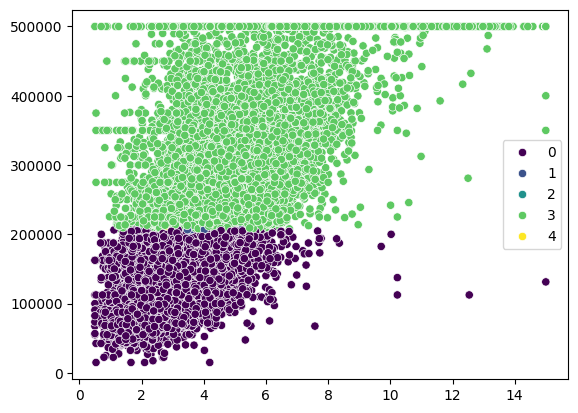

In [14]:
sns.scatterplot(data=pd.DataFrame(data), x=data[:,0], y=data[:,1], hue=labels, palette='viridis')

In [15]:
max_itteration=300

for itteration in range(max_itteration):
    cent=calc_centroids(data,U,m)
    U_new=calculate_membership(data,cent,optimal_k,m)
    
    if np.linalg.norm(U_new-U)<0.0001:
        break
    U=U_new
    
    labels=np.argmax(U_new,axis=1)

<Axes: >

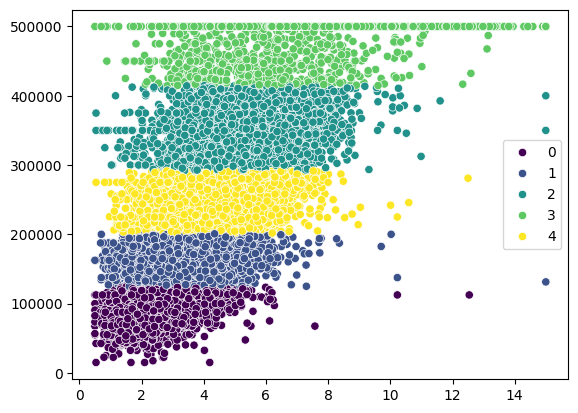

In [16]:
sns.scatterplot(data=pd.DataFrame(data), x=data[:,0], y=data[:,1], hue=labels, palette='viridis')